# Find known BRCA1/2 pathogenic variants and their prevalence in different populations

In [2]:
import pandas as pd
import os

In [3]:
vcf_file = "C:\\Users\\Nick\\clinvar\\clinvar.vcf"

In [4]:
vcf_file_norm = "C:\\Users\\Nick\\clinvar\\clinvar_norm.vcf\\clinvar_norm.vcf"

In [5]:
print(vcf_file)

C:\Users\Nick\clinvar\clinvar.vcf


In [6]:
# Filter DataFrame to main columns
columns = ['CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO']

In [7]:
#df_v = pd.read_csv(vcf_file, sep = '\t',comment="#",low_memory=False, names=columns)
df_v_n = pd.read_csv(vcf_file_norm, sep = '\t',comment="#",low_memory=False, names=columns)
print(df_v_n.shape)

(247699, 8)


# Clean Clinvar Dataset

In [8]:
# Change CHROM value
df_v_n["CHROM"] = df_v_n["CHROM"].replace('NC_000013.11','13')
df_v_n["CHROM"] = df_v_n["CHROM"].replace('NC_000017.11','17')

In [9]:
# Clinvar_ncbi_normalized - BRCA2 = 19173879, 114326280
# Clinvar_ncbi_normalized - BRCA1 = 13422, 83094568
# ClinVar - brca1_chrom, brca1_start, brca1_end = "17", 43044294, 43125482
# ClinVar - brca2_chrom, brca2_start, brca2_end = "13", 32315479, 32399671
# gnomAD brca1 - 43039296  43175241
# gnomAD brca2 - 32310488, 32405258
'''
x1 = 43039296
x2 = 32310488
y1 = 43175241
y2 = 32405258

# Isolate variants for Gene BRCA1
brca1 = df_chr17[(df_chr17['POS'] > x1-1) & (df_chr17['POS'] < y1+1)]

# Isolate variants for Gene BRCA1
brca2 = df_chr13[(df_chr13['POS'] > x2-1) & (df_chr13['POS'] < y2+1)]
'''

# Separate BRCA1/BRCA2 Genes
brca1 = df_v_n[df_v_n['CHROM'] == '17']
brca2 = df_v_n[df_v_n['CHROM'] == '13']

brca1_c = brca1.copy()
brca2_c = brca2.copy()

# Find min/max values of "POS" column
min13, max13 = (min(brca2['POS']),max(brca2['POS']))
min17, max17 = (min(brca1['POS']),max(brca1['POS']))
print(min13,max13)
print(min17,max17)

19173879 114326280
13422 83094568


In [10]:
# Example: apply parsing to the whole INFO column
def parse_info(info_string):
    """Convert INFO string like 'AF=0.5;DP=100' into a dict."""
    info_dict = {}
    for part in info_string.split(';'):
        if '=' in part:
            key, value = part.split('=', 1)  # split only on first "="
            info_dict[key] = value
        else:
            # handle flags like "DB" or "SOMATIC"
            info_dict[part] = True
    return info_dict

# Apply to BRCA1 and BRCA2
brca1_c["INFO_dict"] = brca1_c["INFO"].apply(parse_info)
brca2_c["INFO_dict"] = brca2_c["INFO"].apply(parse_info)

# Now expand dicts into columns
brca1_expanded = pd.concat(
    [brca1_c.drop(columns=["INFO_dict"]), brca1_c["INFO_dict"].apply(pd.Series)], axis=1
)
brca2_expanded = pd.concat(
    [brca2_c.drop(columns=["INFO_dict"]), brca2_c["INFO_dict"].apply(pd.Series)], axis=1
)

# View Intro Analytics: ClinVar Dataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

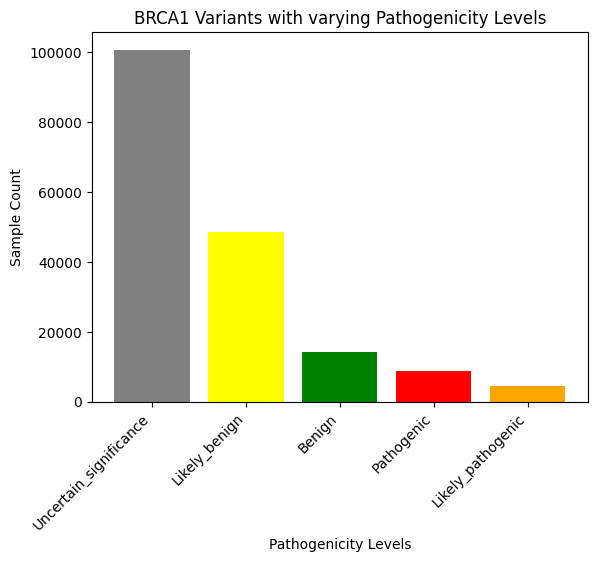

In [12]:
# Perform value_counts on brca1['CLINSIG'] column
brca1_counts = brca1_expanded['CLNSIG'].value_counts()

## Clean & Consolidate 'CLINSIG' column
#brca1_expanded['CLNSIG'] = brca1_expanded['CLNSIG'].replace('Pathogenic/Likely_pathogenic','Pathogenic')
brca1_expanded['CLNSIG'] = brca1_expanded['CLNSIG'].replace('Benign/Likely_benign','Benign')

# Only include key pathogenicity levels
brca1_clin = brca1_expanded[(brca1_expanded['CLNSIG']=='Likely_pathogenic')|(brca1_expanded['CLNSIG']=='Pathogenic')|
    (brca1_expanded['CLNSIG']=='Benign')|(brca1_expanded['CLNSIG']=='Likely_benign')|(brca1_expanded['CLNSIG']=='Uncertain_significance')]

# Show updated value counts
brca1_clin_counts = brca1_clin['CLNSIG'].value_counts()

# Coloring Categories 
category_colors = {
    'Pathogenic': 'red',
    'Likely_pathogenic': 'orange',
    'Likely_benign': 'yellow',
    'Benign': 'green',
    'Uncertain_significance': 'gray',
}

# Create a list of colors based on the categories
colors = [category_colors[path] for path in brca1_clin['CLNSIG'].unique()]

# Show Bar Chart
plt.bar(brca1_clin_counts.index, brca1_clin_counts.values,color = colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pathogenicity Levels')
plt.ylabel('Sample Count')
plt.title('BRCA1 Variants with varying Pathogenicity Levels')
plt.show()

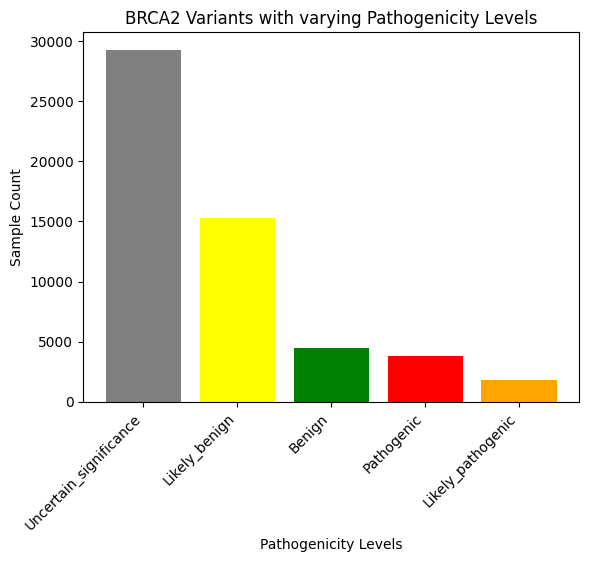

In [13]:
# Perform value_counts on brca1['CLINSIG'] column
brca2_counts = brca2_expanded['CLNSIG'].value_counts()

## Clean & Consolidate 'CLINSIG' column
brca2_expanded['CLNSIG'] = brca2_expanded['CLNSIG'].replace('Pathogenic/Likely_pathogenic','Pathogenic')
brca2_expanded['CLNSIG'] = brca2_expanded['CLNSIG'].replace('Benign/Likely_benign','Benign')

# Only include key pathogenicity levels
brca2_clin = brca2_expanded[(brca2_expanded['CLNSIG']=='Likely_pathogenic')|(brca2_expanded['CLNSIG']=='Pathogenic')|
    (brca2_expanded['CLNSIG']=='Benign')|(brca2_expanded['CLNSIG']=='Likely_benign')|(brca2_expanded['CLNSIG']=='Uncertain_significance')]

# Show updated value counts
brca2_clin_counts = brca2_clin['CLNSIG'].value_counts()
#brca2_counts = brca2_expanded['CLNSIG'].value_counts()

# Coloring Categories 
category_colors = {
    'Pathogenic': 'red',
    'Likely_pathogenic': 'orange',
    'Likely_benign': 'yellow',
    'Benign': 'green',
    'Uncertain_significance': 'gray',
}

# Create a list of colors based on the categories
colors = [category_colors[path] for path in brca1_clin['CLNSIG'].unique()]

plt.bar(brca2_clin_counts.index, brca2_clin_counts.values,color = colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pathogenicity Levels')
plt.ylabel('Sample Count')
plt.title('BRCA2 Variants with varying Pathogenicity Levels')
plt.show()

In [14]:
# Reset Indexes for BRCA1/2
brca1_ri = brca1_clin.reset_index(drop=True)
brca2_ri = brca2_clin.reset_index(drop=True)

In [15]:
# Create a boolean DataFrame indicating null values
null_counts = brca1_expanded.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
CHROM                0
POS                  0
ID                   0
REF                  0
ALT                  0
QUAL                 0
FILTER               0
INFO                 0
ALLELEID             0
CLNHGVS              0
CLNVC                0
CLNVCSO              0
ORIGIN            1194
SCI             187684
SCIDISDB        187714
SCIDN           187714
SCIREVSTAT      187684
SCISCV          187714
CLNDISDB           795
CLNDN              795
CLNREVSTAT         765
CLNSIG             765
CLNSIGSCV          795
GENEINFO          1047
MC                1648
CLNVI            41959
RS               42236
AF_TGP          163770
AF_ESP          165060
AF_EXAC         136396
CLNSIGCONF      179584
CLNDISDBINCL    187650
CLNDNINCL       187650
CLNSIGINCL      187650
ONC             187591
ONCDISDB        187621
ONCDN           187621
ONCREVSTAT      187591
ONCSCV          187621
DBVARID         187716
dtype: int64


# GnomAD Integration

Count how many pathogenic variants per gene, per population.

Graph pathogenic variant frequencies by ancestry group.

Highlight ClinVar pathogenic variants missing in gnomAD.

Identify conflicting classifications (e.g. ClinVar “Pathogenic” but relatively common in gnomAD).

In [16]:
!pip install google-cloud
!pip install google-cloud-bigquery[pandas]
!pip install google-cloud-storage

# Authenticate Google BigQuery API

In [17]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\Users\\Nick\\Downloads\\nodal-episode-437923-f5-796713c72f07.json"
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
bigquery_client = bigquery.Client()

In [18]:
!pip install ipywidgets
!pip install IProgress
!pip install --upgrade tqdm
!pip install google-cloud-bigquery-storage
#!pip install --upgrade google-cloud-bigquery
import ipywidgets as widgets
import IProgress

In [19]:
def run_query(query):
    query_job = bigquery_client.query(query)
    result = query_job.to_dataframe(progress_bar_type='tqdm_notebook')
    gb_processed = (query_job.total_bytes_billed / 1024 ** 3)
    print('This query processed {} GB of data which is {}% of your 1 TB monthly free quota.'.format(gb_processed, round(gb_processed / 1024 * 100, 4)))
    return result

# Set Widget Variables for Chr.17, Gene BRCA1

In [95]:
print("Variables for Region (Type 1) Queries")

gnomad_version_widget_region = widgets.Dropdown(
    options=['v2_1_1_exomes', 'v2_1_1_genomes', 'v3_genomes','v4_genomes'],
    value='v3_genomes',
    description='gnomAD version:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(gnomad_version_widget_region)

chromosome_widget_region = widgets.Dropdown(
    options=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
             'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
             'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
             'chrX', 'chrY'],
    value='chr17',
    description='Chromosome:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(chromosome_widget_region)

gene_symbol_widget_region= widgets.Text(
    value='BRCA1',
    placeholder='gene_symbol',
    description='Gene Symbol:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(gene_symbol_widget_region)

Variables for Region (Type 1) Queries


Dropdown(description='gnomAD version:', index=2, options=('v2_1_1_exomes', 'v2_1_1_genomes', 'v3_genomes', 'v4…

Dropdown(description='Chromosome:', index=16, options=('chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',…

Text(value='BRCA1', description='Gene Symbol:', placeholder='gene_symbol', style=TextStyle(description_width='…

In [96]:
# Set the variables for the rest of the Type 1 queries based on the values above.
gnomad_version_region=gnomad_version_widget_region.value
chromosome_region=chromosome_widget_region.value
gene_symbol_region=gene_symbol_widget_region.value


print('Running Region (Type 1) queries on gnomAD version: {}, chromosome: {}, gene symbol: {}'.format(
    gnomad_version_region,
    chromosome_region,
    gene_symbol_region
))

if gnomad_version_region.startswith('v3'):
  # Variant type (snv, indel, multi-snv, multi-indel, or mixed) is stored under difference columns in V2 and V3
  variant_type_col = 'variant_type'
  extra_columns = ''
else:
  variant_type_col = 'alternate_bases. allele_type'
  # These vep columns only exist in V2
  extra_columns = 'vep.STRAND AS STRAND, vep.Protein_position AS Protein_pos,'

Running Region (Type 1) queries on gnomAD version: v3_genomes, chromosome: chr17, gene symbol: BRCA1


# Run Queries: BRCA1

In [22]:
# Finding All Possible GnomAD columns

In [97]:
query_template = """
SELECT column_name, field_path, description
FROM `bigquery-public-data`.gnomAD.INFORMATION_SCHEMA.COLUMN_FIELD_PATHS
WHERE table_name = "{GNOMAD_VER}__{CHROM}"
      AND column_name IN (
          SELECT COLUMN_NAME
          FROM `bigquery-public-data`.gnomAD.INFORMATION_SCHEMA.COLUMNS
          WHERE table_name = "{GNOMAD_VER}__{CHROM}")
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region)

column_info = run_query(query)
print('There are {} columns in `bigquery-public-data.gnomAD.{}__{}` table'.format(len(column_info.index),
                                                                                  gnomad_version_region,
                                                                                  chromosome_region))
column_info.head(7)

Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.01953125 GB of data which is 0.0019% of your 1 TB monthly free quota.
There are 181 columns in `bigquery-public-data.gnomAD.v3_genomes__chr17` table


,column_name,field_path,description
0,reference_name,reference_name,Reference name.
1,start_position,start_position,Start position (0-based). Corresponds to the f...
2,end_position,end_position,End position (0-based). Corresponds to the fir...
3,reference_bases,reference_bases,Reference bases.
4,alternate_bases,alternate_bases,One record for each alternate base (if any).
5,alternate_bases,alternate_bases.alt,Alternate base.
6,alternate_bases,alternate_bases.AC,Alternate allele count for samples


In [24]:
# Send to more readable .csvw
#print(column_info)
#gnomAD_columns = column_info.copy()
#gnomAD_csv = gnomAD_columns.to_csv('gnomAD_columns.csv', index=False)

In [25]:
# Finding Gene BRCA1 Limits

In [98]:
# ClinVar VCF Limits - 43044294, 43125482
# gnomAD VCF Limits - 43039296  43175241

query_template = """
SELECT MIN(start_position) AS X, MAX(end_position) AS Y
FROM `bigquery-public-data.gnomAD.{GNOMAD_VER}__{CHROM}` AS main_table
WHERE EXISTS
  (SELECT 1 FROM UNNEST(main_table.alternate_bases) AS alternate_bases
   WHERE EXISTS (SELECT 1 from alternate_bases.vep WHERE SYMBOL = '{GENE}'))
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region,
                              GENE=gene_symbol_region)

limits = run_query(query)

print(limits)
x = limits.at[0, 'X']
y = limits.at[0, 'Y']

Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.0 GB of data which is 0.0% of your 1 TB monthly free quota.
          X         Y
0  43039296  43175241


In [27]:
# Query for 'Main Stats'

In [28]:
['#CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO']
# NOTE: For v2_1_1 the "variant_type" column must be replaced with "alternate_bases.allele_type AS variant_type"
query_template = """
SELECT reference_name AS CHROM,
       start_position AS POS,
       names AS ID,
       reference_bases AS REF,
       alternate_bases.alt AS ALT,
       quality AS QUAL,
       filter AS FILTER,
       alternate_bases.AC AS AC,
       alternate_bases.AF AS AF,
       AN AS AN,
       variant_type AS VT,
FROM `bigquery-public-data.gnomAD.{GNOMAD_VER}__{CHROM}` AS main_table,
     main_table.alternate_bases AS alternate_bases
WHERE start_position >= {X} AND start_position <= {Y}
ORDER BY 1,2
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region, X=x, Y=y)

stats = run_query(query)
stats.head()


Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.009765625 GB of data which is 0.001% of your 1 TB monthly free quota.


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,AC,AF,AN,VT
0,chr17,43039296,[rs909752554],A,T,2153.0,[PASS],2,0.000014,143340,snv
1,chr17,43039301,[rs1016951561],T,C,3734.0,[PASS],7,0.000049,143316,snv
2,chr17,43039307,[],T,C,587.0,[PASS],1,0.000007,143302,snv
3,chr17,43039316,[],A,G,358.0,[PASS],1,0.000007,143326,snv
4,chr17,43039336,[],TAG,T,584.0,[PASS],1,0.000007,143244,indel


# View Allele Frequencies by Population Group for BRCA2

In [99]:
# Query Everything for gnomAD BRCA1'
main_cols = ['#CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO']
# NOTE: For v2_1_1 the "variant_type" column must be replaced with "alternate_bases.allele_type AS variant_type"
query_template = """
SELECT *,
FROM `bigquery-public-data.gnomAD.{GNOMAD_VER}__{CHROM}` AS main_table,
     main_table.alternate_bases AS alternate_bases
WHERE start_position >= {X} AND start_position <= {Y}
ORDER BY 1,2
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region, X=x, Y=y)

erything = run_query(query)
erything.head()

Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.0 GB of data which is 0.0% of your 1 TB monthly free quota.


,reference_name,start_position,end_position,reference_bases,alternate_bases,names,quality,filter,call,AN,...,faf99_afr,faf95_sas,faf99_sas,faf95_amr,faf99_amr,faf95_nfe,faf99_nfe,faf95_eas,faf99_eas,vep
0,chr17,43039296,43039297,A,"[{'alt': 'T', 'AC': 2, 'AF': 1.39528e-05, 'n_a...",[rs909752554],2153.0,[PASS],[],143340,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[{'allele': 'T', 'Consequence': 'downstream_ge..."
1,chr17,43039301,43039302,T,"[{'alt': 'C', 'AC': 7, 'AF': 4.88431e-05, 'n_a...",[rs1016951561],3734.0,[PASS],[],143316,...,0.000032,0.0,0.0,0.0,0.0,0.000012,0.000012,0.0,0.0,"[{'allele': 'C', 'Consequence': 'downstream_ge..."
2,chr17,43039307,43039308,T,"[{'alt': 'C', 'AC': 1, 'AF': 6.97827e-06, 'n_a...",[],587.0,[PASS],[],143302,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[{'allele': 'C', 'Consequence': 'downstream_ge..."
3,chr17,43039316,43039317,A,"[{'alt': 'G', 'AC': 1, 'AF': 6.9771e-06, 'n_al...",[],358.0,[PASS],[],143326,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[{'allele': 'G', 'Consequence': 'downstream_ge..."
4,chr17,43039336,43039339,TAG,"[{'alt': 'T', 'AC': 1, 'AF': 6.9811e-06, 'n_al...",[],584.0,[PASS],[],143244,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,"[{'allele': '-', 'Consequence': 'downstream_ge..."


405


C:\Users\Nick\AppData\Local\Temp\ipykernel_28548\4142074767.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_af_s['Sex'][high_af_s['Sex']] = 'female'
C:\Users\Nick\AppData\Local\Temp\ipykernel_28548\4142074767.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'female' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  high_af_s['Sex'][high_af_s['Sex']] = 'female'


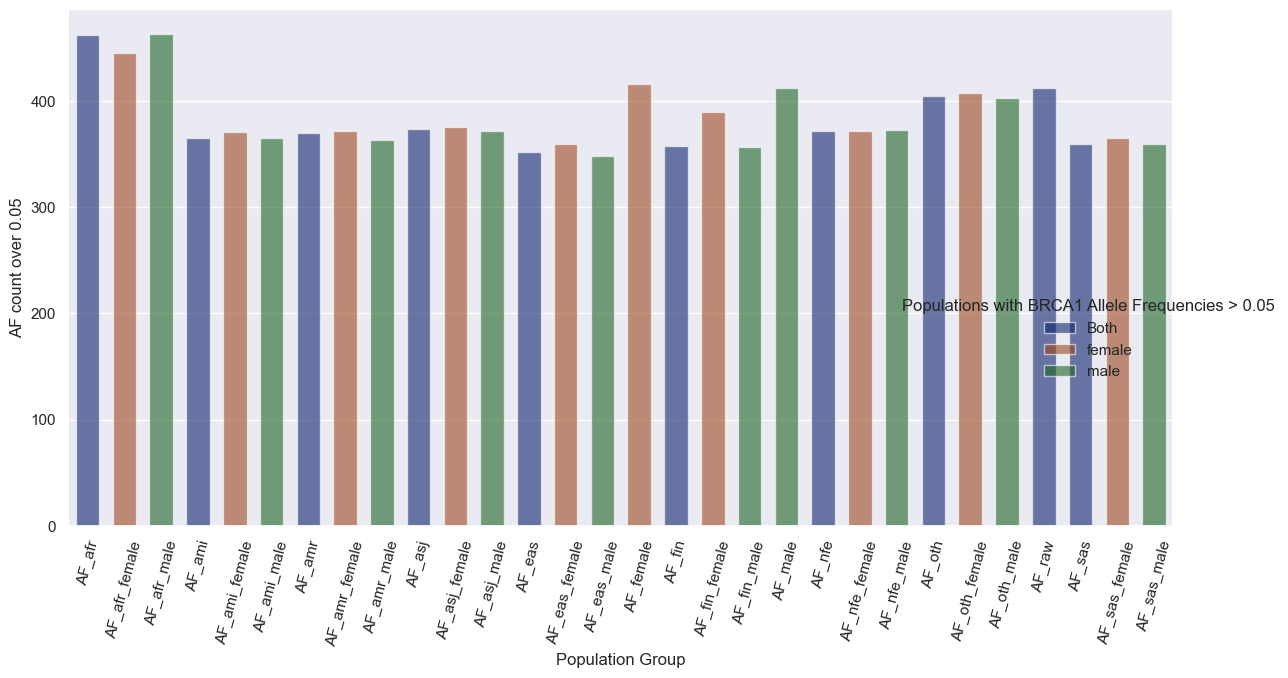

In [100]:
popdata = erything.columns[erything.columns.str.contains('AF_')]
#print(erything[popdata].value_counts())
print(len(erything[erything['AF_oth']>0.05]))

pop_af = {}
for i in popdata:
    high_af_count = len(erything[erything[i]>0.05])
    pop_af[i] = high_af_count

pop_df = pd.DataFrame(pop_af,index=range(0,max(len(pop_af),1)))
high_af_s = pop_df[:1].T
#print(high_af_s.index)

# Create 'Sex' column
high_af_s['Sex'] = high_af_s.index.str.contains('female')
#high_af_s['Sex'] = high_af_s['Sex'].replace({'female': 'Te', 'male': 'False'})
high_af_s['Sex'][high_af_s['Sex']] = 'female'
high_af_s['Sex'][~high_af_s.index.str.contains('female')] = 'male'
high_af_s['Sex'][(~high_af_s.index.str.contains('female'))&(~high_af_s.index.str.contains('male'))] = 'Both'

high_af_s.columns = ['AF count over 0.05','Sex']
#print(high_af_s)

# Sort DataFrame by Population
high_af_s['Population'] = high_af_s.index
high_af_s.reset_index(inplace=True)
high_af_s.drop('index',axis=1,inplace=True)
high_af_sort = high_af_s.sort_values(by='Population')
#print(high_af_sort)
'''
# Insert blank rows every 3 categories
new_df_rows = []
for i, row in high_af_sort.iterrows():
    new_df_rows.append(row)
    if (i + 1) % 3 == 0 and i + 1 < len(df): # Add blank after every 3rd row, but not after the last row
        new_df_rows.append({'Category': '', 'Value': 0}) # Blank category, zero value

df_modified = pd.DataFrame(new_df_rows)
'''
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=high_af_sort, kind="bar",
    x='Population', y='AF count over 0.05', hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=2.0
)

# Adjust the width of the bars
for ax in g.axes.flat:
    for patch in ax.patches:
        # Get the current bar width and x position
        current_width = patch.get_width()
        current_x = patch.get_x()

        # Define the new desired width (e.g., 80% of original)
        new_width = current_width * 0.8

        # Calculate the new x position to center the bar
        new_x = current_x + (current_width - new_width) / 2

        # Set the new width and x position
        patch.set_width(new_width)
        patch.set_x(new_x)

g.despine(left=True)
g.set_axis_labels("Population Group", "AF count over 0.05")
g.tick_params(axis='x', rotation=75)
g.legend.set_title("Populations with BRCA1 Allele Frequencies > 0.05")

In [77]:
brca1_stats_gnomAD = stats.copy()

# Set Widget Variables for Chr.13, Gene BRCA2

In [89]:
print("Variables for Region (Type 1) Queries")

gnomad_version_widget_region = widgets.Dropdown(
    options=['v2_1_1_exomes', 'v2_1_1_genomes', 'v3_genomes','v4_genomes'],
    value='v3_genomes',
    description='gnomAD version:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(gnomad_version_widget_region)

chromosome_widget_region = widgets.Dropdown(
    options=['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
             'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
             'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
             'chrX', 'chrY'],
    value='chr13',
    description='Chromosome:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(chromosome_widget_region)

gene_symbol_widget_region= widgets.Text(
    value='BRCA2',
    placeholder='gene_symbol',
    description='Gene Symbol:',
    disabled=False,
    style={'description_width': 'initial'}
)

display(gene_symbol_widget_region)

Variables for Region (Type 1) Queries


Dropdown(description='gnomAD version:', index=2, options=('v2_1_1_exomes', 'v2_1_1_genomes', 'v3_genomes', 'v4…

Dropdown(description='Chromosome:', index=12, options=('chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7',…

Text(value='BRCA2', description='Gene Symbol:', placeholder='gene_symbol', style=TextStyle(description_width='…

In [90]:
# Set the variables for the rest of the Type 1 queries based on the values above.
gnomad_version_region=gnomad_version_widget_region.value
chromosome_region=chromosome_widget_region.value
gene_symbol_region=gene_symbol_widget_region.value


print('Running Region (Type 1) queries on gnomAD version: {}, chromosome: {}, gene symbol: {}'.format(
    gnomad_version_region,
    chromosome_region,
    gene_symbol_region
))

if gnomad_version_region.startswith('v3'):
  # Variant type (snv, indel, multi-snv, multi-indel, or mixed) is stored under difference columns in V2 and V3
  variant_type_col = 'variant_type'
  extra_columns = ''
else:
  variant_type_col = 'alternate_bases. allele_type'
  # These vep columns only exist in V2
  extra_columns = 'vep.STRAND AS STRAND, vep.Protein_position AS Protein_pos,'

Running Region (Type 1) queries on gnomAD version: v3_genomes, chromosome: chr13, gene symbol: BRCA2


# Run Query: BRCA2

In [34]:
# Finding Gene BRCA1 Limits

In [91]:
# ClinVar Limits - 32315479, 32399671
# GnomAD Limits -  32310488,  32405258

query_template = """
SELECT MIN(start_position) AS X, MAX(end_position) AS Y
FROM `bigquery-public-data.gnomAD.{GNOMAD_VER}__{CHROM}` AS main_table
WHERE EXISTS
  (SELECT 1 FROM UNNEST(main_table.alternate_bases) AS alternate_bases
   WHERE EXISTS (SELECT 1 from alternate_bases.vep WHERE SYMBOL = '{GENE}'))
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region,
                              GENE=gene_symbol_region)

limits = run_query(query)

print(limits)
x = limits.at[0, 'X']
y = limits.at[0, 'Y']

Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.6796875 GB of data which is 0.0664% of your 1 TB monthly free quota.
          X         Y
0  32310488  32405258


In [36]:
# Query for 'Main Stats'

In [92]:
query_template = """
SELECT reference_name AS CHROM,
       start_position AS POS,
       names AS ID,
       reference_bases AS REF,
       alternate_bases.alt AS ALT,
       quality AS QUAL,
       filter AS FILTER,
       alternate_bases.AC AS AC,
       alternate_bases.AF AS AF,
       AN AS AN,
       variant_type AS VT,
FROM `bigquery-public-data.gnomAD.{GNOMAD_VER}__{CHROM}` AS main_table,
     main_table.alternate_bases AS alternate_bases
WHERE start_position >= {X} AND start_position <= {Y}
ORDER BY 1,2
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region, X=x, Y=y)

stats2 = run_query(query)
stats2.head()

Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.009765625 GB of data which is 0.001% of your 1 TB monthly free quota.


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,AC,AF,AN,VT
0,chr13,32310488,[],A,G,403.0,[PASS],1,0.000007,143254,snv
1,chr13,32310494,[],C,T,504.0,[PASS],1,0.000007,143300,snv
2,chr13,32310498,[],T,A,287.0,[PASS],1,0.000007,143230,snv
3,chr13,32310502,[],G,A,563.0,[PASS],1,0.000007,143224,snv
4,chr13,32310503,[],T,TTTTTTTAATG,843.0,"[AC0, AS_VQSR]",0,0.000000,143258,indel


# View Allele Frequencies by Population Group for BRCA1

In [93]:
# Query All, Filter by Alternate Allele Frequencies per Ethnicity
query_template = """
SELECT *,
FROM `bigquery-public-data.gnomAD.{GNOMAD_VER}__{CHROM}` AS main_table,
     main_table.alternate_bases AS alternate_bases
WHERE start_position >= {X} AND start_position <= {Y}
ORDER BY 1,2
"""
query = query_template.format(GNOMAD_VER=gnomad_version_region,
                              CHROM=chromosome_region, X=x, Y=y)

erything2 = run_query(query)
erything2.head()

Query is running:   0%|          |

Downloading:   0%|          |

This query processed 0.0458984375 GB of data which is 0.0045% of your 1 TB monthly free quota.


,reference_name,start_position,end_position,reference_bases,alternate_bases,names,quality,filter,call,AN,...,faf99_afr,faf95_sas,faf99_sas,faf95_amr,faf99_amr,faf95_nfe,faf99_nfe,faf95_eas,faf99_eas,vep
0,chr13,32310488,32310489,A,"[{'alt': 'G', 'AC': 1, 'AF': 6.98061e-06, 'n_a...",[],403.0,[PASS],[],143254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[{'allele': 'G', 'Consequence': 'intron_varian..."
1,chr13,32310494,32310495,C,"[{'alt': 'T', 'AC': 1, 'AF': 6.97837e-06, 'n_a...",[],504.0,[PASS],[],143300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[{'allele': 'T', 'Consequence': 'intron_varian..."
2,chr13,32310498,32310499,T,"[{'alt': 'A', 'AC': 1, 'AF': 6.98178e-06, 'n_a...",[],287.0,[PASS],[],143230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[{'allele': 'A', 'Consequence': 'intron_varian..."
3,chr13,32310502,32310503,G,"[{'alt': 'A', 'AC': 1, 'AF': 6.98207e-06, 'n_a...",[],563.0,[PASS],[],143224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[{'allele': 'A', 'Consequence': 'intron_varian..."
4,chr13,32310503,32310504,T,"[{'alt': 'TTTTTTTAATG', 'AC': 0, 'AF': 0.0, 'n...",[],843.0,"[AC0, AS_VQSR]",[],143258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[{'allele': 'TTTTTTAATG', 'Consequence': 'intr..."


405


C:\Users\Nick\AppData\Local\Temp\ipykernel_28548\2460245113.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_af_s['Sex'][high_af_s['Sex']] = 'female'
C:\Users\Nick\AppData\Local\Temp\ipykernel_28548\2460245113.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'female' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  high_af_s['Sex'][high_af_s['Sex']] = 'female'


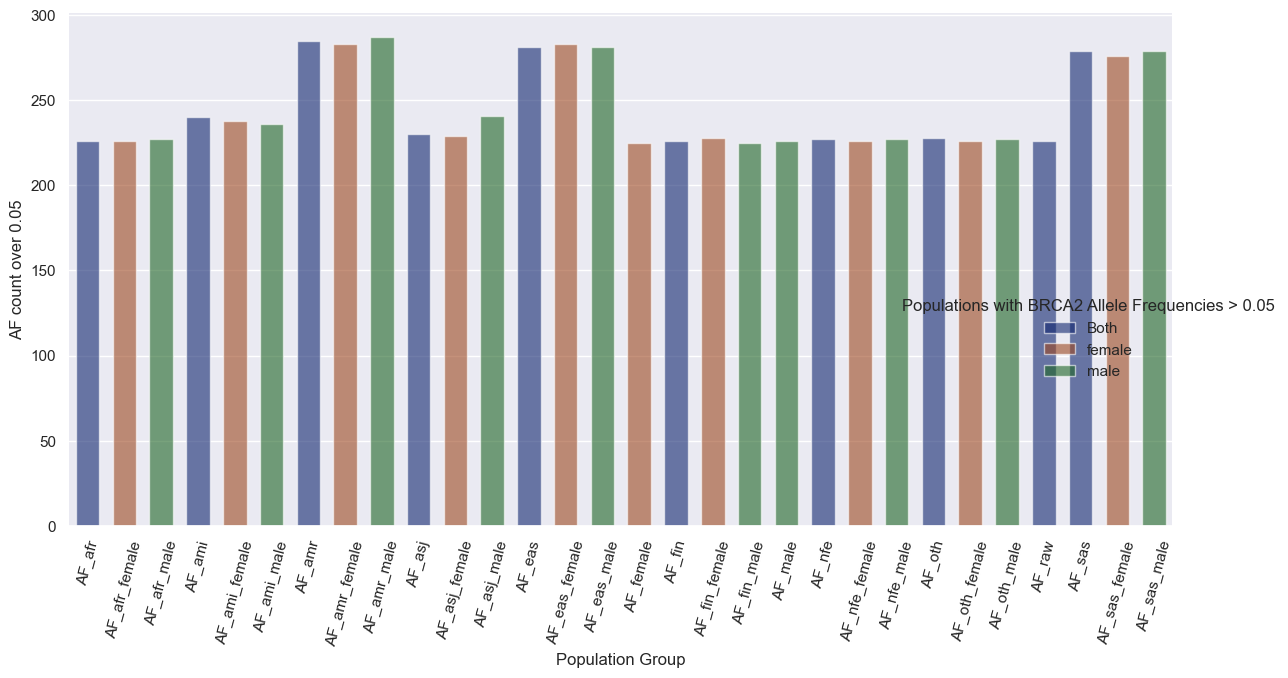

In [94]:
popdata2 = erything2.columns[erything2.columns.str.contains('AF_')]
#print(erything[popdata].value_counts())
print(len(erything[erything['AF_oth']>0.05]))

pop_af = {}
for i in popdata2:
    high_af_count = len(erything2[erything2[i]>0.05])
    pop_af[i] = high_af_count

pop_df = pd.DataFrame(pop_af,index=range(0,max(len(pop_af),1)))
high_af_s = pop_df[:1].T
#print(high_af_s.index)

# Create 'Sex' column
high_af_s['Sex'] = high_af_s.index.str.contains('female')
#high_af_s['Sex'] = high_af_s['Sex'].replace({'female': 'Te', 'male': 'False'})
high_af_s['Sex'][high_af_s['Sex']] = 'female'
high_af_s['Sex'][~high_af_s.index.str.contains('female')] = 'male'
high_af_s['Sex'][(~high_af_s.index.str.contains('female'))&(~high_af_s.index.str.contains('male'))] = 'Both'

high_af_s.columns = ['AF count over 0.05','Sex']
#print(high_af_s)

# Sort DataFrame by Population
high_af_s['Population'] = high_af_s.index
high_af_s.reset_index(inplace=True)
high_af_s.drop('index',axis=1,inplace=True)
high_af_sort = high_af_s.sort_values(by='Population')
#print(high_af_sort)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=high_af_sort, kind="bar",
    x='Population', y='AF count over 0.05', hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=2.0
)

# Adjust the width of the bars
for ax in g.axes.flat:
    for patch in ax.patches:
        # Get the current bar width and x position
        current_width = patch.get_width()
        current_x = patch.get_x()

        # Define the new desired width (e.g., 80% of original)
        new_width = current_width * 0.8

        # Calculate the new x position to center the bar
        new_x = current_x + (current_width - new_width) / 2

        # Set the new width and x position
        patch.set_width(new_width)
        patch.set_x(new_x)

g.despine(left=True)
g.set_axis_labels("Population Group", "AF count over 0.05")
g.tick_params(axis='x', rotation=75)
g.legend.set_title("Populations with BRCA2 Allele Frequencies > 0.05")

In [81]:
brca2_stats_gnomAD = stats2.copy()

# Clean gnomAD Datasets

In [83]:
brca1_gnomAD = brca1_stats_gnomAD
brca2_gnomAD = brca2_stats_gnomAD # contains specific data in AF and VT columns

In [84]:
# Change CHROM datatype to string, BRCA1
brca1_gnomAD['CHROM'] = brca1_gnomAD['CHROM'].astype(str)
brca1_gnomAD['CHROM'] = brca1_gnomAD['CHROM'].str.replace('chr17', '17', n=-1, case=None, regex=True)

# Change CHROM datatype to string, BRCA2
brca2_gnomAD['CHROM'] = brca2_gnomAD['CHROM'].astype(str)
brca2_gnomAD['CHROM'] = brca2_gnomAD['CHROM'].str.replace('chr13', '13', n=-1, case=None, regex=True)

In [129]:
brca1_gnomAD.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'AC', 'AF', 'AN',
       'VT'],
      dtype='object')

[Text(0.5, 0, 'Base Position'), Text(0, 0.5, 'Allele Frequency')]

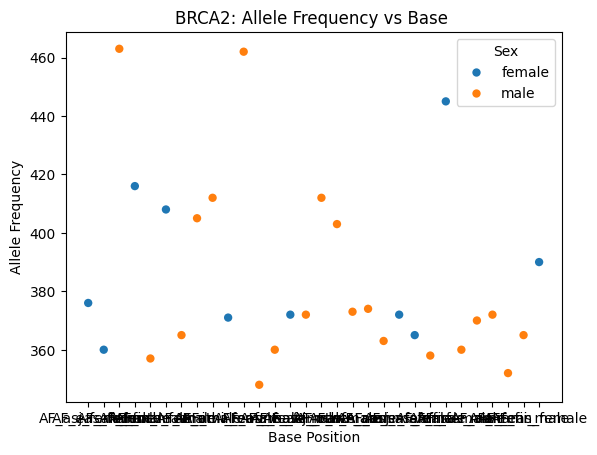

In [48]:
## BRCA2: Graph Populations vs. AF
# Maybe try multi-trend analysis

# Create a list of colors based on the categories
#colors = [category_colors[path] for path in df_all2['CLNSIG'].unique()]

# Plot sepal width as a function of sepal_length across days
ax = sns.scatterplot(x=high_af_s.index, y='AF count over 0.05',
               hue=high_af_s['Sex'], #size="depth",
                #palette=colors, #"ch:r=-.2,d=.3_r",
               # hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=high_af_s)

# Set the title and x/y axis labels
ax.set_title("BRCA2: Allele Frequency vs Base ")
ax.set(xlabel="Base Position", ylabel="Allele Frequency")

# Combining Data from ClinVar & gnomAD

In [127]:
# POS ONLY Merge
df_merge1 = brca1_ri.merge(brca1_gnomAD,on=['POS'])
df_pos1 = df_merge1[['CHROM_x','POS','REF_x','ALT_x','REF_y','ALT_y','CLNSIG','AF','VT']]

# Merge using CHROM, POS, REF, ALT
df_allmerge1 = brca1_ri.merge(brca1_gnomAD,on=['CHROM','POS','REF','ALT'])
df_all1 = df_allmerge1[['CHROM','POS','REF','ALT','CLNSIG','AF','VT']]
df_all1.head()

# Filter for only Pathogenic 
df_path_1 = df_all1[df_all1['CLNSIG'] == 'Pathogenic']
df_pathsort_1 = df_path_1.sort_values(by='CLNSIG',ascending=False)
df_path_1.head()

# Sort by AF
df_afsort_1 = df_all1.sort_values(by='AF',ascending=False)
print(df_afsort_1.head())

   CHROM       POS REF            ALT                  CLNSIG        AF     VT
1     17  43048520   T              C                  Benign  0.018008    snv
33    17  43100595   T              A                  Benign  0.008186    snv
4     17  43056991   G  GGGAGTGGAATAC  Uncertain_significance  0.001829  indel
8     17  43066355   A              G                  Benign  0.000531    snv
40    17  43125259   G              A           Likely_benign  0.000412    snv


[Text(0.5, 0, 'Base Position'), Text(0, 0.5, 'Allele Frequency')]

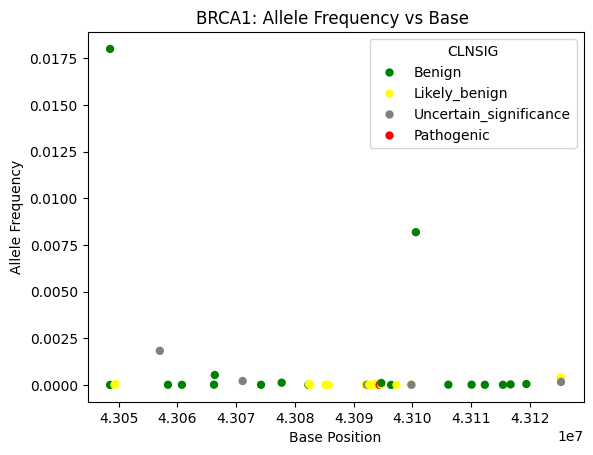

In [124]:
## BRCA1: Graph CLNSIG vs. AF

# Create a list of colors based on the categories
colors = [category_colors[path] for path in df_all1['CLNSIG'].unique()]

# Plot sepal width as a function of sepal_length across days
ax = sns.scatterplot(x="POS", y="AF",
                hue="CLNSIG", #size="depth",
                palette=colors, #"ch:r=-.2,d=.3_r",
               # hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df_all1 )#ax=ax)

# Set the title and x/y axis labels
ax.set_title("BRCA1: Allele Frequency vs Base ")
ax.set(xlabel="Base Position", ylabel="Allele Frequency")

# BRCA2: ClinVar x gnomAD

In [128]:
# POS ONLY Merge
df_merge2 = brca2_ri.merge(brca2_gnomAD,on=['POS'])
df_pos2 = df_merge2[['CHROM_x','POS','REF_x','ALT_x','REF_y','ALT_y','CLNSIG','AF','VT']]

# Merge using CHROM, POS, REF, ALT
df_allmerge2 = brca2_ri.merge(brca2_gnomAD,on=['CHROM','POS','REF','ALT'])
df_all2 = df_allmerge2[['CHROM','POS','REF','ALT','CLNSIG','AF','VT']]
df_all2.head()

# Filter for only Pathogenic 
df_path_2 = df_all2[df_all2['CLNSIG'] == 'Pathogenic']
df_pathsort_2 = df_path_2.sort_values(by='CLNSIG',ascending=False)
df_path_2.head()

# Sort by AF
df_afsort_2 = df_all2.sort_values(by='AF',ascending=False)
print(df_afsort_2.head())

   CHROM       POS REF ALT         CLNSIG        AF   VT
56    13  32398746   A   G  Likely_benign  0.037870  snv
42    13  32373523   A   T         Benign  0.022045  snv
20    13  32340058   G   A  Likely_benign  0.006409  snv
23    13  32343207   T   C         Benign  0.004152  snv
57    13  32399611   A   G         Benign  0.003929  snv


[Text(0.5, 0, 'Base Position'), Text(0, 0.5, 'Allele Frequency')]

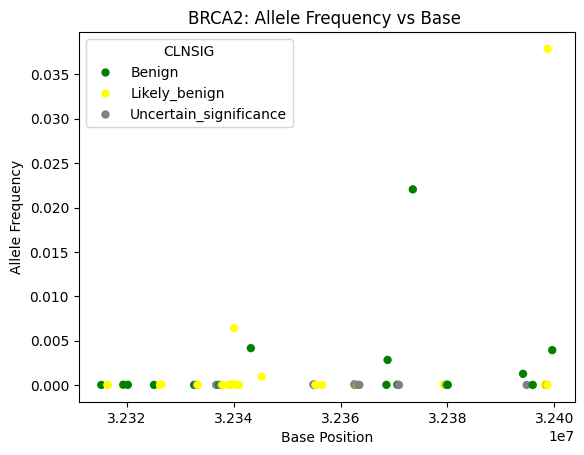

In [125]:
## BRCA2: Graph Base Position vs. AF, Colors are CLNSIG

# Create a list of colors based on the categories
colors = [category_colors[path] for path in df_all2['CLNSIG'].unique()]

# Plot sepal width as a function of sepal_length across days
ax = sns.scatterplot(x="POS", y="AF",
                hue="CLNSIG", #size="depth",
                palette=colors, #"ch:r=-.2,d=.3_r",
               # hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df_all2 )#ax=ax)

# Set the title and x/y axis labels
ax.set_title("BRCA2: Allele Frequency vs Base ")
ax.set(xlabel="Base Position", ylabel="Allele Frequency")